In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sept = pd.read_csv('data/agregada/un_dia_ecobici_18_9_agregada.csv',index_col = 0,parse_dates=True)
sept.index = sept.index.strftime('%H:%M')
jul = pd.read_csv('data/agregada/un_dia_ecobici_19_7_agregada.csv',index_col = 0,parse_dates=True)
jul.index = jul.index.strftime('%H:%M')

In [3]:
jul_max_sistema = jul.max_bicis_sistema.unique().item()
sept_max_sistema = sept.max_bicis_sistema.unique().item()


<Figure size 432x288 with 0 Axes>

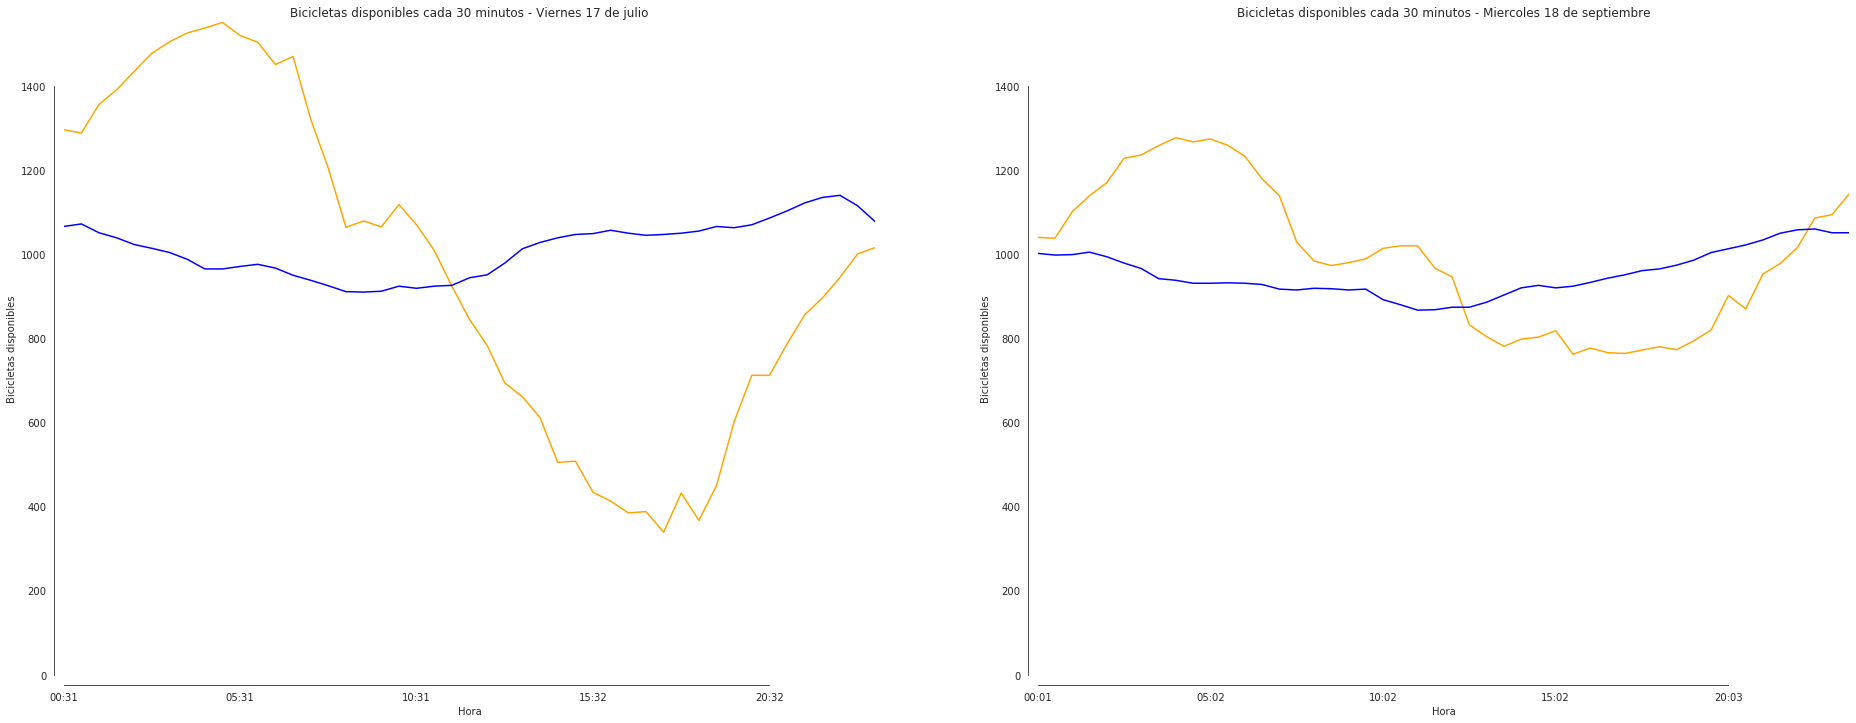

In [6]:
sns.set_style("white")

sns.despine(left=True)

f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(32,12))

jul.num_bikes_available.plot(ax=ax1, color = 'orange')

jul.num_bikes_disabled.plot(ax=ax1, color = 'blue')

sept.num_bikes_available.plot(ax=ax2, color = 'orange')
sept.num_bikes_disabled.plot(ax=ax2, color = 'blue')

ax1.set_xlabel('Hora')
ax1.set_ylabel('Bicicletas disponibles')
ax1.set_title('Bicicletas disponibles cada 30 minutos - Viernes 17 de julio')

ax2.set_xlabel('Hora')
ax2.set_ylabel('Bicicletas disponibles')
ax2.set_title('Bicicletas disponibles cada 30 minutos - Miercoles 18 de septiembre')


max_eje_y = max(jul.num_bikes_available.max(),sept.num_bikes_available.max())
ax1.set_ylim(0,max_eje_y)
ax2.set_ylim(0,max_eje_y)

sns.despine(offset=10, trim=True);



f.savefig('img/disponibles.png');

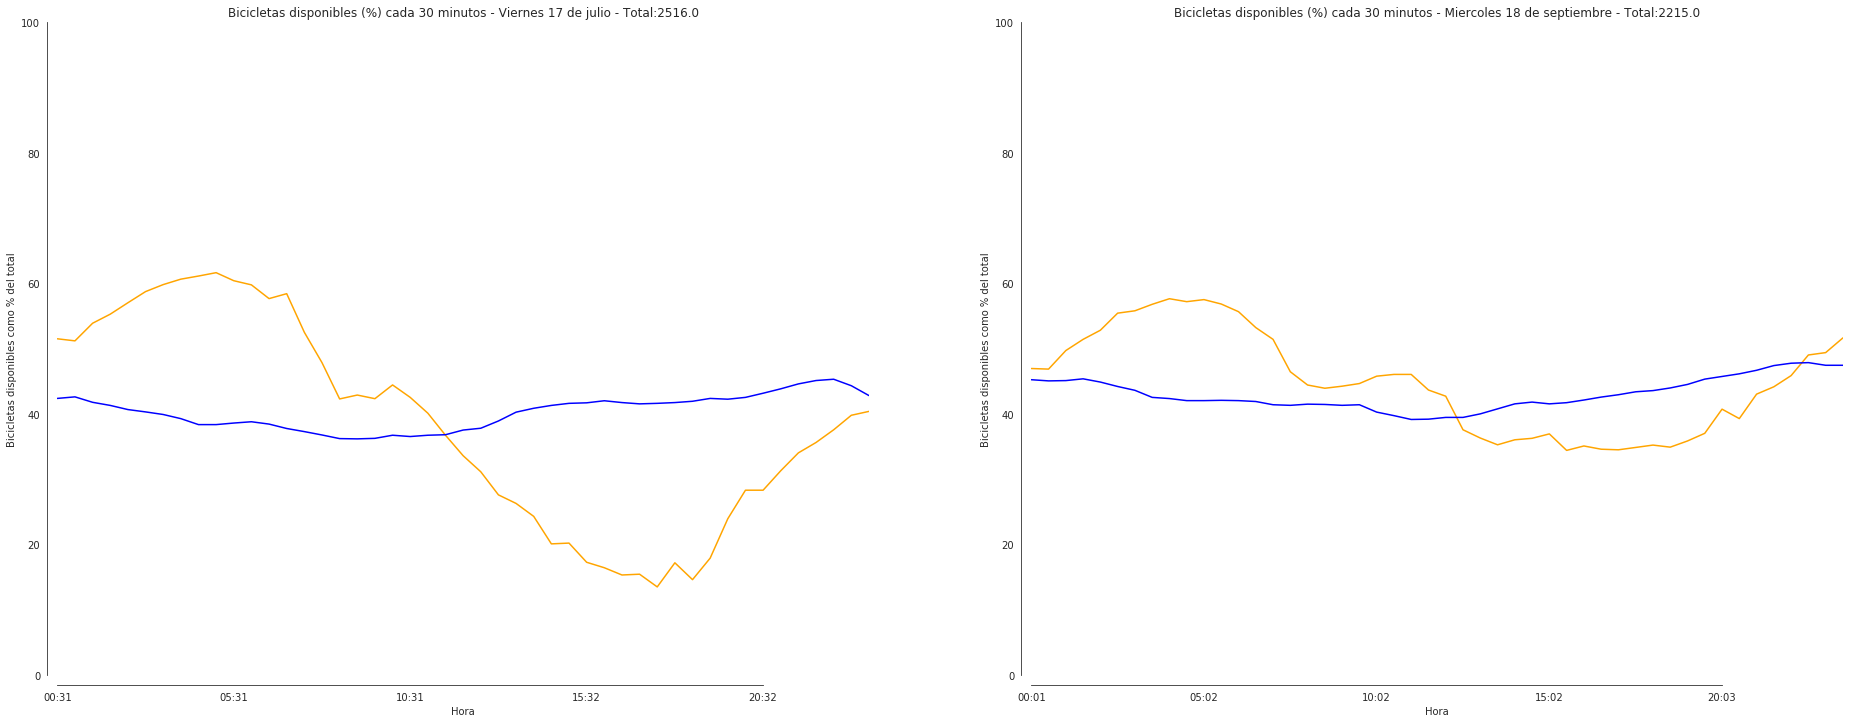

In [7]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(32,12))

(jul.num_bikes_available / jul_max_sistema *100).plot(ax=ax1, color = 'orange')
(jul.num_bikes_disabled / jul_max_sistema*100).plot(ax=ax1, color = 'blue')

(sept.num_bikes_available / sept_max_sistema*100).plot(ax=ax2, color = 'orange')
(sept.num_bikes_disabled / sept_max_sistema*100).plot(ax=ax2, color = 'blue')

ax1.set_xlabel('Hora')
ax1.set_ylabel('Bicicletas disponibles como % del total')
ax1.set_title('Bicicletas disponibles (%) cada 30 minutos - Viernes 17 de julio - Total:'+ str(jul_max_sistema))

ax2.set_xlabel('Hora')
ax2.set_ylabel('Bicicletas disponibles como % del total')
ax2.set_title('Bicicletas disponibles (%) cada 30 minutos - Miercoles 18 de septiembre - Total:'+ str(sept_max_sistema))

ax1.set_ylim(0,100)
ax2.set_ylim(0,100)

sns.despine(offset=10, trim=True);

f.savefig('img/disponibles_prop.png')

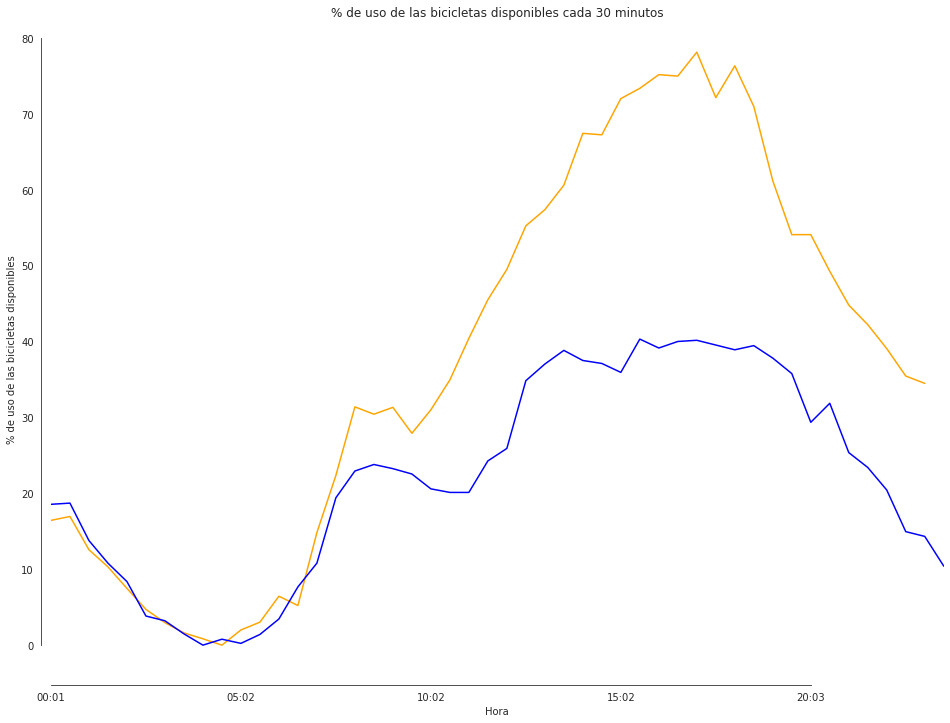

In [8]:
f,ax=plt.subplots(figsize=(16,12))
(100-(jul.num_bikes_available/jul.num_bikes_available.max()*100)).plot(ax=ax,color = 'orange')
(100-(sept.num_bikes_available/sept.num_bikes_available.max()*100)).plot(ax=ax,color = 'blue')

ax.set_xlabel('Hora')
ax.set_ylabel('% de uso de las bicicletas disponibles')
ax.set_title('% de uso de las bicicletas disponibles cada 30 minutos')

sns.despine(offset=10, trim=True)
f.savefig('img/uso.png');

In [9]:
jul['estacionadas_p'] = jul.num_bikes_available/jul.max_bicis_sistema * 100
jul['rotas_p'] = jul.num_bikes_disabled/jul.max_bicis_sistema * 100
jul['uso_p'] = 100  - jul['estacionadas_p'] - jul['rotas_p']

sept['estacionadas_p'] = sept.num_bikes_available/sept.max_bicis_sistema * 100
sept['rotas_p'] = sept.num_bikes_disabled/sept.max_bicis_sistema * 100
sept['uso_p'] = 100  - sept['estacionadas_p'] - sept['rotas_p']

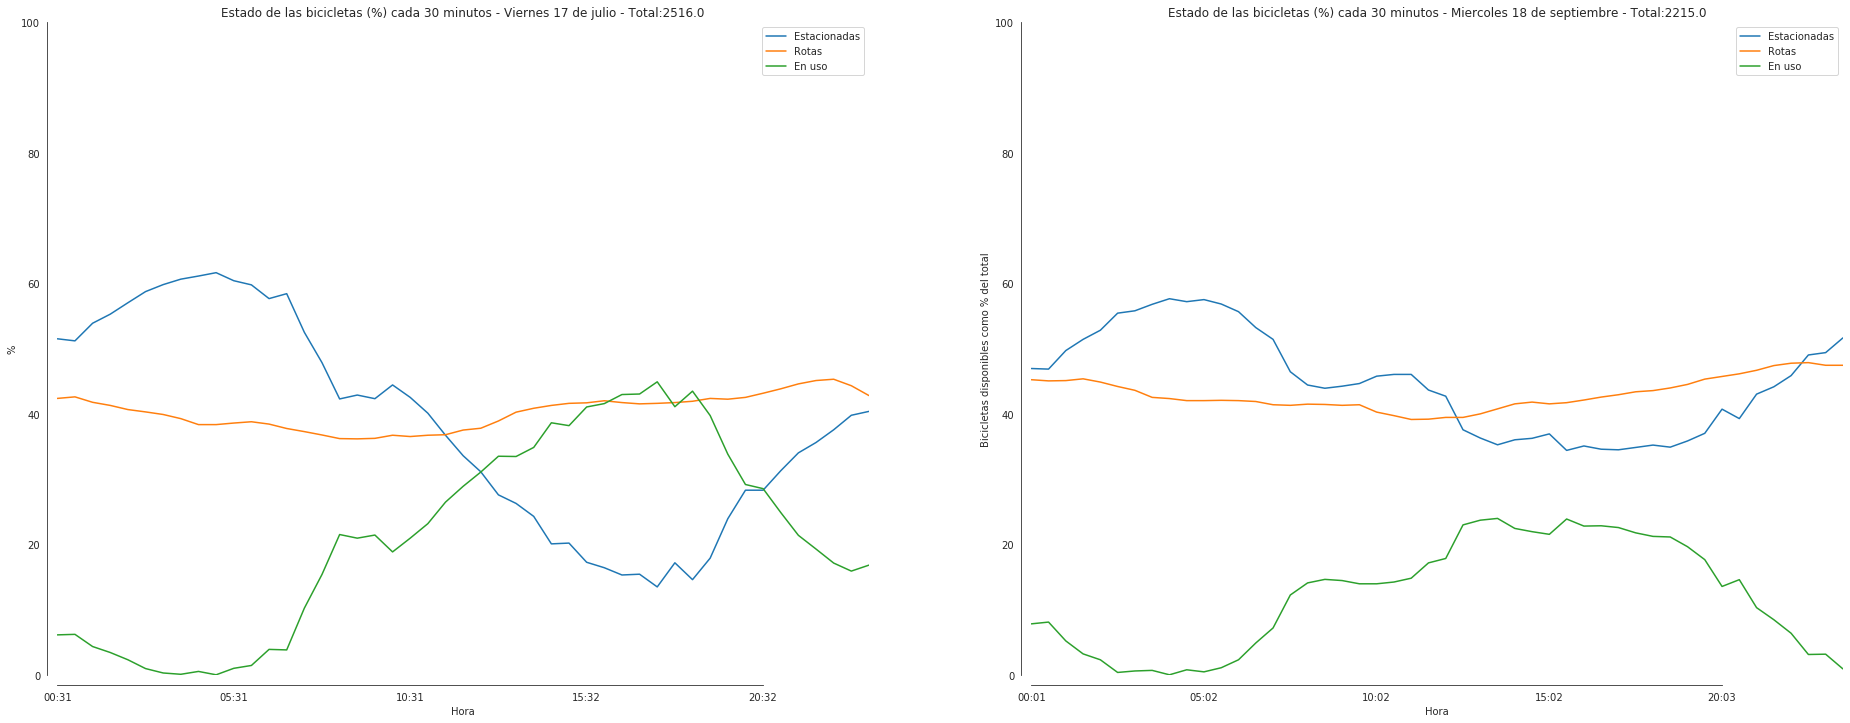

In [10]:
f,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(32,12))

jul['estacionadas_p'].plot(ax=ax1)
jul['rotas_p'].plot(ax=ax1)
jul['uso_p'].plot(ax=ax1)

sept['estacionadas_p'].plot(ax=ax2)
sept['rotas_p'].plot(ax=ax2)
sept['uso_p'].plot(ax=ax2)
ax1.legend(['Estacionadas','Rotas','En uso'])
ax2.legend(['Estacionadas','Rotas','En uso'])

ax1.set_xlabel('Hora')
ax1.set_ylabel('%')
ax1.set_title('Estado de las bicicletas (%) cada 30 minutos - Viernes 17 de julio - Total:'+ str(jul_max_sistema))

ax2.set_xlabel('Hora')
ax2.set_ylabel('Bicicletas disponibles como % del total')
ax2.set_title('Estado de las bicicletas (%) cada 30 minutos - Miercoles 18 de septiembre - Total:'+ str(sept_max_sistema))

ax1.set_ylim(0,100)
ax2.set_ylim(0,100)

sns.despine(offset=10, trim=True)
f.savefig('img/estado.png');

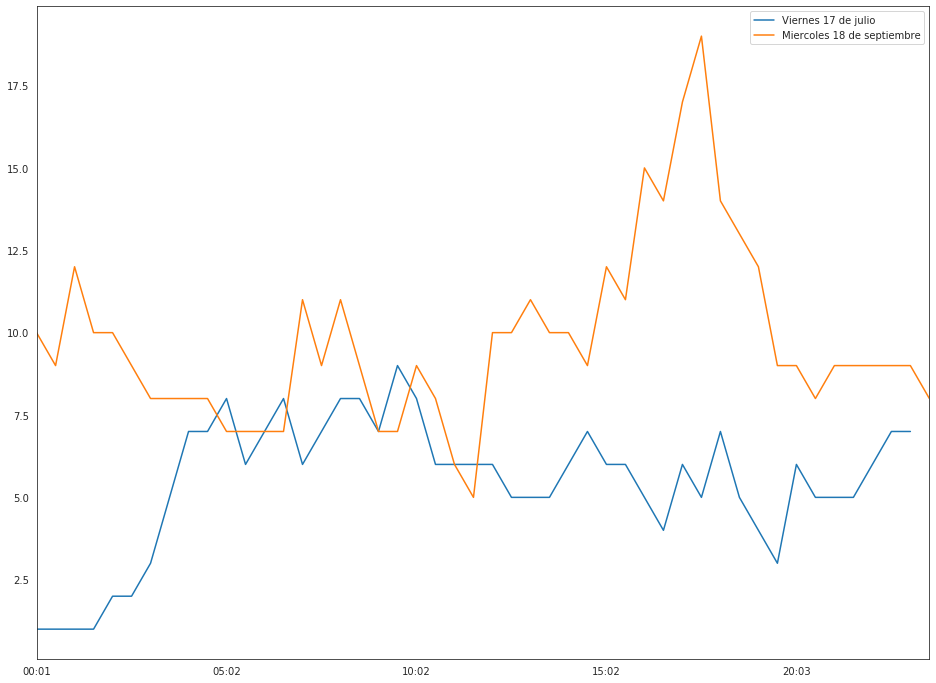

In [19]:
f,ax=plt.subplots(figsize=(16,12))

jul.sospechosa.plot(ax=ax)
sept.sospechosa.plot(ax=ax)
ax.legend(['Viernes 17 de julio','Miercoles 18 de septiembre'])

ax1.set_xlabel('Hora')
ax1.set_ylabel('Estaciones con mas de 10 min sin reportar')
ax1.set_title('Estaciones sin reportar cada 30 min');
f.savefig('img/sin_reportar.png');